# Logistic Regression

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("seaborn")

### Data Preparation

In [158]:
# Data - generate using numpy

mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,1.2]])

mean_02=np.array([4,5])
cov_02=np.array([[1.2,0.1],[0.1,1.3]])

dist_1=np.random.multivariate_normal(mean_01,cov_01,500)
dist_2=np.random.multivariate_normal(mean_02,cov_02,500)

In [159]:
dist_1.shape

(500, 2)

### Visualization

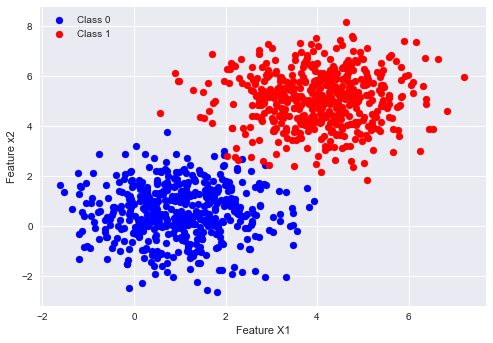

In [160]:
plt.figure()
plt.scatter(dist_1[:,0],dist_1[:,1],color="blue",label="Class 0")
plt.scatter(dist_2[:,0],dist_2[:,1],color="red",label="Class 1")
plt.legend()
plt.xlabel("Feature X1")
plt.ylabel("Feature x2")
plt.show()

In [185]:
data=np.zeros((1000,3))
data.shape

(1000, 3)

In [316]:
data[:500,:2]=dist_1
data[:500,2]=0
data[500:,:2]=dist_2
data[500:,2]=1
data

array([[ 0.38867582,  0.73823795,  0.        ],
       [ 2.42616093,  0.37974803,  0.        ],
       [ 0.10397465, -0.29117241,  0.        ],
       ...,
       [ 5.00270097,  6.68053322,  1.        ],
       [ 2.9200064 ,  7.30921185,  1.        ],
       [ 3.19398798,  5.98751225,  1.        ]])

In [317]:
np.random.shuffle(data)
data

array([[ 3.31687888,  3.78628382,  1.        ],
       [ 1.84303588,  1.57152029,  0.        ],
       [-0.11433638,  0.4757787 ,  0.        ],
       ...,
       [ 0.45851015, -0.43385197,  0.        ],
       [ 0.54418838, -0.0123224 ,  0.        ],
       [ 3.66226495,  4.39456124,  1.        ]])

In [319]:
X=data[:,:2]
Y=data[:,2]

X.shape,Y.shape

((1000, 2), (1000,))

### Split The Data

In [283]:
from sklearn import model_selection

X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,random_state=1,test_size=0.2)

X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [284]:
X_train

array([[ 2.94108334,  4.69975437],
       [ 2.07151723,  5.74419802],
       [ 3.58122068,  4.79073788],
       ...,
       [-1.18667638,  1.59486075],
       [ 0.85347631, -1.23995474],
       [ 2.5870586 ,  3.34449487]])

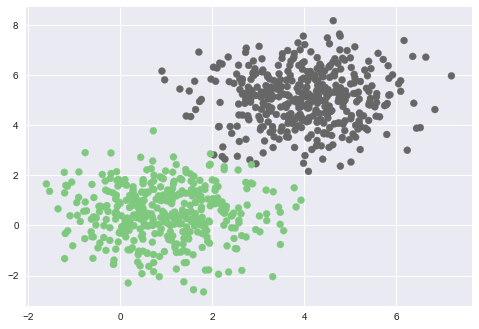

In [285]:
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

### Data Normalisation

In [286]:
X_train_mean=X_train.mean(axis=0)
X_train_std=X_train.std(axis=0)
X_train=(X_train-X_train_mean)/X_train_std
X_train

array([[ 0.24898589,  0.75296474],
       [-0.22018448,  1.16380476],
       [ 0.59436903,  0.78875381],
       ...,
       [-1.97812776, -0.46836926],
       [-0.87737282, -1.58346593],
       [ 0.05797348,  0.2198629 ]])

In [287]:
#Apply the same transformation on the test data also

X_test=(X_test-X_train_mean)/X_train_std

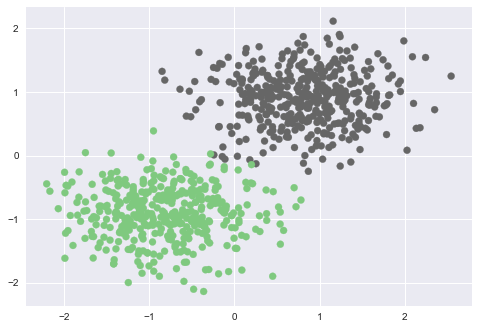

In [288]:
#Here the center is shifted to 0,0 and each cluster has deviation of about 1 unit across horizontal and vertical direction
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [289]:
X_train.std(axis=0) #close to 1

array([1., 1.])

In [290]:
X_train.mean(axis=0) #close to 0

array([-1.48089874e-15, -1.60364777e-15])

### Logistic Regression Implementation

In [291]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def hypo(X,theta):
    return sigmoid(np.dot(X,theta))

def predict(X,theta):
    '''
       X is an entire array of (m,n+1)
       Theta is an entire array of (n+1,1)
    '''
    yp=hypo(X,theta)
    output=np.zeros(yp.shape)
    output[yp>=0.5]=1
    output=output.astype('int')
    return output

def accuracy(Y,Yp):
    
    Y=Y.astype('int')
    ans=np.sum(Y==Yp)/Y.shape[0]
    return ans*100

def error(X,y,theta):
    yp=hypo(X,theta)
    e=np.mean((y*np.log(yp))+((1-y)*np.log(1-yp)))
    return -e


def gradient(X,y,theta):
    M,N=X.shape
    yp=hypo(X,theta)
    grad=np.dot(y-yp,X)
    return -grad/M


def gradient_descent(X,y,lr=0.5,max_itr=500):
    M,N=X.shape
    theta=np.zeros((N,))
    error_list=[]
    
    for i in range(max_itr):
        e=error(X,y,theta)
        # Stop the loop when the change in e is very small
        error_list.append(e)
        
        grad=gradient(X,y,theta)
        
        theta=theta-lr*grad
        
    return theta,error_list
    

In [292]:
sigmoid(np.array([[1,2],[2,3]]))

array([[0.73105858, 0.88079708],
       [0.88079708, 0.95257413]])

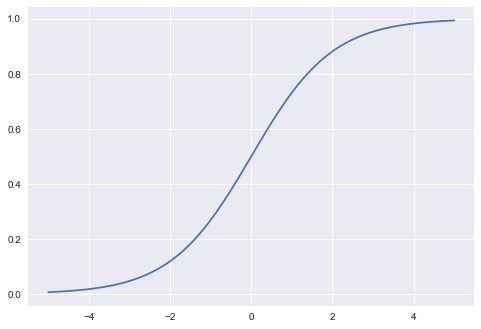

In [293]:
a=np.linspace(-5,5,200)

plt.figure()
plt.plot(a,sigmoid(a))
plt.show()

In [294]:
ones=np.ones((X_train.shape[0],1))
X_train_new=np.hstack((ones,X_train))

In [295]:
X_train_new.shape

(800, 3)

In [296]:
theta,error_list=gradient_descent(X_train_new,Y_train)

In [297]:
theta

array([0.15664241, 2.90480989, 4.82490929])

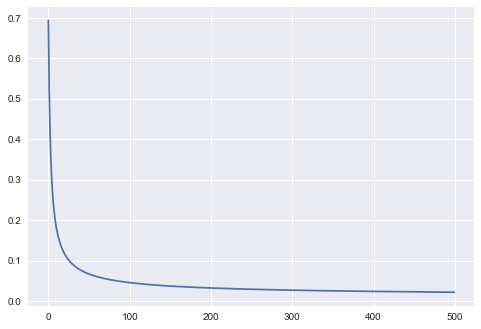

In [298]:
plt.plot(error_list)
plt.show()

In [299]:
ones=np.ones((X_test.shape[0],1))
X_test_new=np.hstack((ones,X_test))

In [300]:
X_test_new.shape

(200, 3)

### Visualize Decision Surface

In [301]:
x1=np.arange(-3,4)
x2=-(theta[0]+theta[1]*x1)/theta[2]

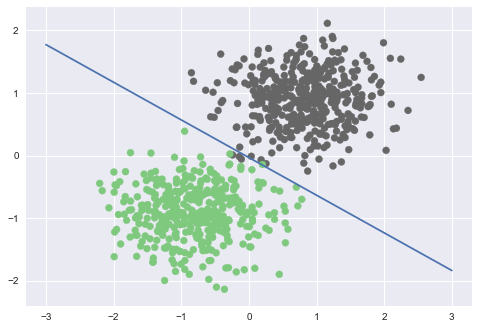

In [302]:
plt.figure()
plt.plot(x1,x2)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

### Predictions

In [303]:
Y_pred=predict(X_test_new,theta)
Y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0])

In [304]:
X_test.shape,Y_pred.shape

((200, 2), (200,))

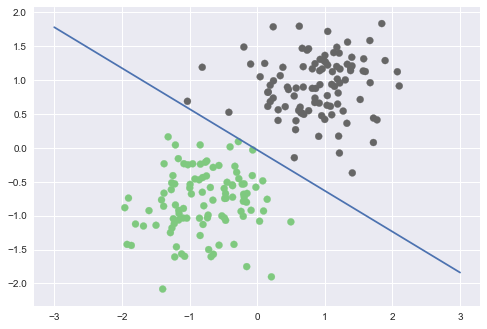

In [305]:
plt.figure()
plt.plot(x1,x2)
plt.scatter(X_test[:,0],X_test[:,1],c=Y_pred,cmap=plt.cm.Accent)
plt.show()

In [306]:
Y_pred_train=predict(X_train_new,theta)
accuracy(Y_train,Y_pred_train)

99.5

In [307]:
accuracy(Y_test,Y_pred)

100.0

### Using SKLearn

In [308]:
from sklearn.linear_model import LogisticRegression

In [309]:
alg=LogisticRegression()

In [310]:
alg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [311]:
alg.intercept_

array([0.18236123])

In [312]:
alg.coef_

array([[2.61250963, 4.70614575]])

In [313]:
alg.predict(X_test)

array([1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.])

In [314]:
alg.score(X_train,Y_train)

0.995

In [315]:
alg.score(X_test,Y_test)

1.0